<a href="https://colab.research.google.com/github/humphrjk/Business_Analytics/blob/main/Forecast_with_Prophet_Daily_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
from prophet import Prophet


In [11]:
url='https://github.com/humphrjk/Business_Analytics/files/9389458/forecasting_with_prophet-daily_orders.csv'
df = pd.read_csv(url)
df.head()

,date,value
0,2016-01-01 00:00:00,18131.0
1,2016-01-02 00:00:00,18208.0
2,2016-01-03 00:00:00,19850.0
3,2016-01-04 00:00:00,40296.0
4,2016-01-05 00:00:00,45138.0


In [12]:
df.shape 

(785, 2)

In [13]:
df.dtypes

date      object
value    float64
dtype: object

In [14]:
df ['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [16]:
df['ds']= df['date']
df['y'] = df['value']
    

In [17]:
df.set_index('date')

,value,ds,y
date,,,
2016-01-01,18131.0,2016-01-01,18131.0
2016-01-02,18208.0,2016-01-02,18208.0
2016-01-03,19850.0,2016-01-03,19850.0
2016-01-04,40296.0,2016-01-04,40296.0
2016-01-05,45138.0,2016-01-05,45138.0
...,...,...,...
2018-02-19,418878.0,2018-02-19,418878.0
2018-02-20,548106.0,2018-02-20,548106.0
2018-02-21,610556.0,2018-02-21,610556.0


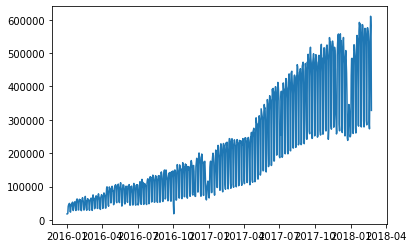

In [19]:
import matplotlib.pyplot as plt
x = df['ds']
y = df['y']
plt.plot(x,y)

In [20]:
from scipy.stats import boxcox

In [25]:
df['y'], lam = boxcox(df['y'])

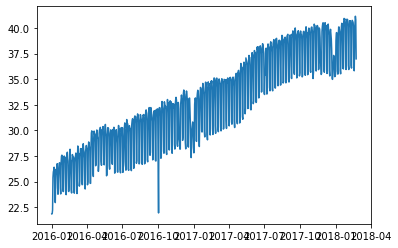

In [26]:
x = df['ds']
y = df['y']
plt.plot(x,y)

In [28]:
import prophet


In [29]:
m = prophet.Prophet()

In [30]:
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri8vo4t4/fabzpq8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpri8vo4t4/m1wlo1h0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80440', 'data', 'file=/tmp/tmpri8vo4t4/fabzpq8i.json', 'init=/tmp/tmpri8vo4t4/m1wlo1h0.json', 'output', 'file=/tmp/tmplmgqq_wq/prophet_model-20220821171914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


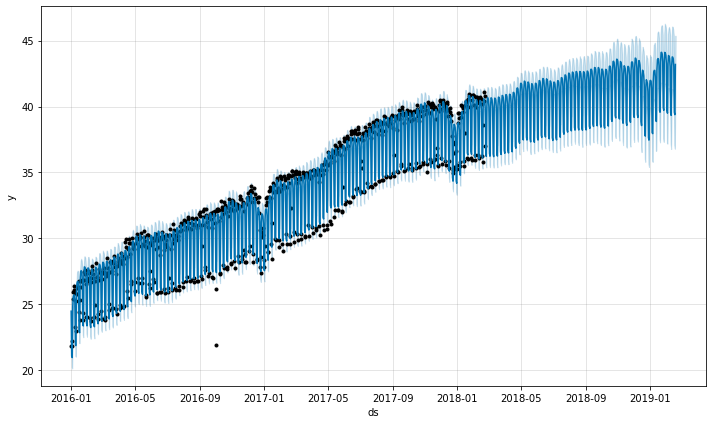

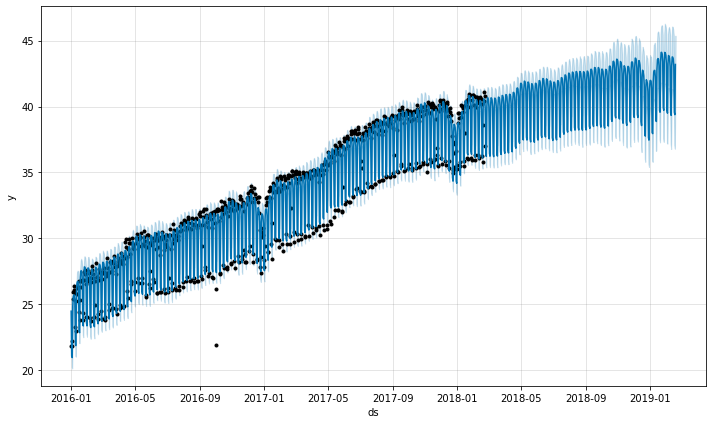

In [31]:
future =m.make_future_dataframe(periods=360)
forecast = m.predict(future)
m.plot(forecast)

In [35]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1140,2019-02-14,42.534088,41.100902,45.836881,40.237424,44.660332,1.082081,1.082081,1.082081,1.303629,1.303629,1.303629,-0.221548,-0.221548,-0.221548,0.0,0.0,0.0,43.616168
1141,2019-02-15,42.543146,40.427544,45.379162,40.237793,44.676667,0.482966,0.482966,0.482966,0.701597,0.701597,0.701597,-0.218631,-0.218631,-0.218631,0.0,0.0,0.0,43.026112
1142,2019-02-16,42.552204,37.082119,41.911538,40.238162,44.693002,-2.984368,-2.984368,-2.984368,-2.771624,-2.771624,-2.771624,-0.212744,-0.212744,-0.212744,0.0,0.0,0.0,39.567836
1143,2019-02-17,42.561262,36.802867,41.675422,40.238531,44.715006,-3.175147,-3.175147,-3.175147,-2.970589,-2.970589,-2.970589,-0.204558,-0.204558,-0.204558,0.0,0.0,0.0,39.386115
1144,2019-02-18,42.570320,40.631562,45.384408,40.235042,44.742658,0.625804,0.625804,0.625804,0.820580,0.820580,0.820580,-0.194776,-0.194776,-0.194776,0.0,0.0,0.0,43.196124


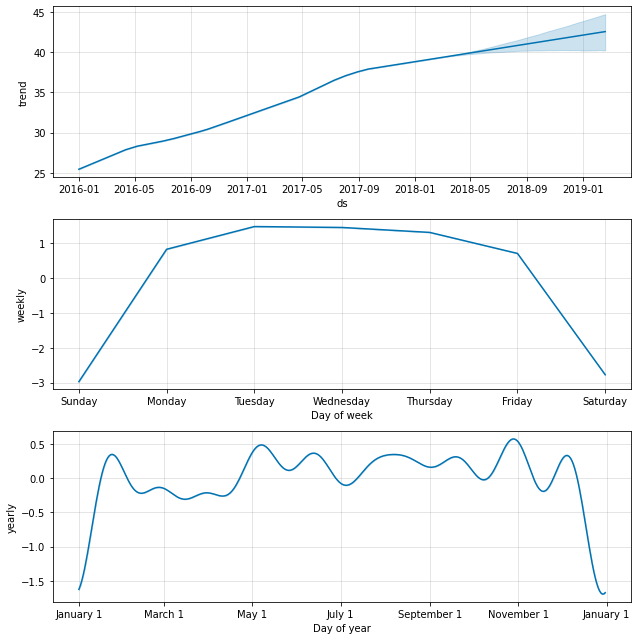

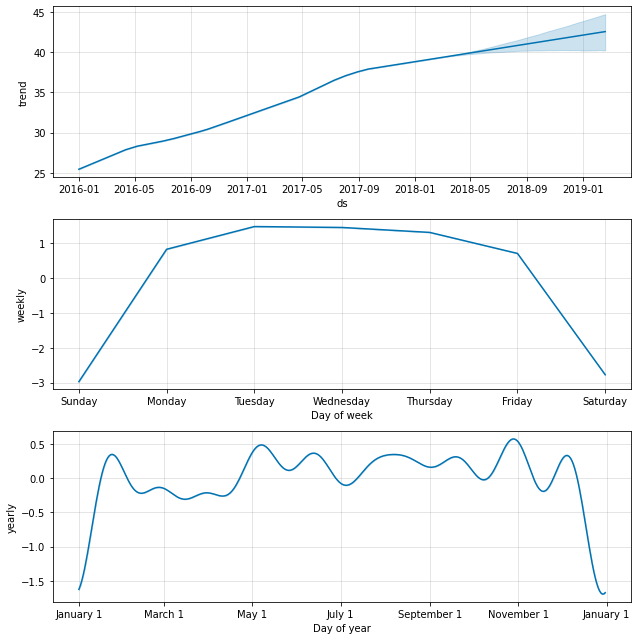

In [36]:
m.plot_components(forecast)